# Classification template

## Importing the libraries

In [1]:
!pip install -r requirements.txt

You should consider upgrading via the '/home/kisobral/Documentos/Playgrounds/QuarentenaDados/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Pre-Processing
### Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print("---X SIZES---")
print("Train set shape: {}".format(X_train.shape))
print("Test set shape:  {}".format(X_test.shape), end="\n\n")
print("---y SIZES---")
print("Train set shape: {}".format(y_train.shape))
print("Test set shape:  {}".format(y_test.shape), end="\n\n")

---X SIZES---
Train set shape: (300, 2)
Test set shape:  (100, 2)

---y SIZES---
Train set shape: (300,)
Test set shape:  (100,)



### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting classifier to the Training set

In [7]:
from sklearn.linear_model import (
    SGDClassifier,
    PassiveAggressiveClassifier,
    LogisticRegression
)
# Stochatisc Gradient Classifier fitting
stochastic_grad_classifier = SGDClassifier(max_iter=15, random_state=42)
stochastic_grad_classifier.fit(X_train, y_train)

# Passive Aggressive Classifier fitting
passive_agressive_classifier = PassiveAggressiveClassifier(random_state=42)
passive_agressive_classifier.fit(X_train, y_train)

# Logistic Regression model fitting
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Predicting the Test set results
stochatisc_y_pred = stochastic_grad_classifier.predict(X_test)
passive_agressive_y_pred = passive_agressive_classifier.predict(X_test)
logistic_regression_y_pred = logistic_regression_classifier.predict(X_test)

/home/kisobral/Documentos/Playgrounds/QuarentenaDados/venv/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# Making the Confusion Matrixes


In [8]:
from sklearn.metrics import confusion_matrix
# Stochastic confusion matrix
stochastic_cm = confusion_matrix(y_test, stochatisc_y_pred)

# Passive Agressive confusion matrix
passive_agressive_cm = confusion_matrix(y_test, passive_agressive_y_pred)

# Logistic Regression confusion matrix
logistic_regression_cm = confusion_matrix(y_test, logistic_regression_y_pred)

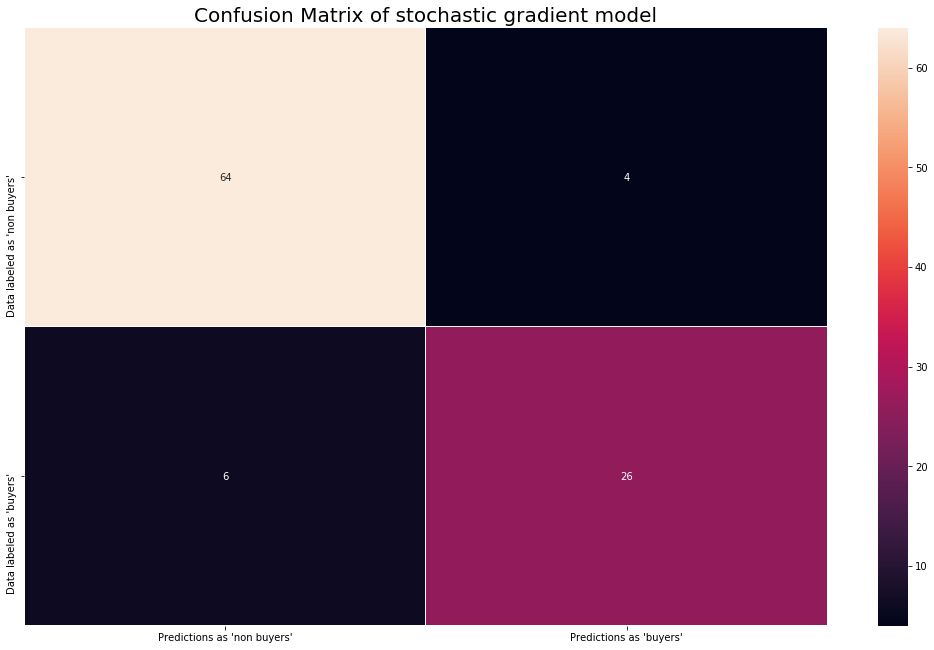

In [9]:
plt.figure(figsize=(18,11))
plt.title("Confusion Matrix of stochastic gradient model", fontsize=20)
ax = sns.heatmap(
    stochastic_cm,
    annot=True,
    linewidths=.01,
    xticklabels= ["Predictions as 'non buyers'", "Predictions as 'buyers'"],
    yticklabels= ["Data labeled as 'non buyers'", "Data labeled as 'buyers'"]
)

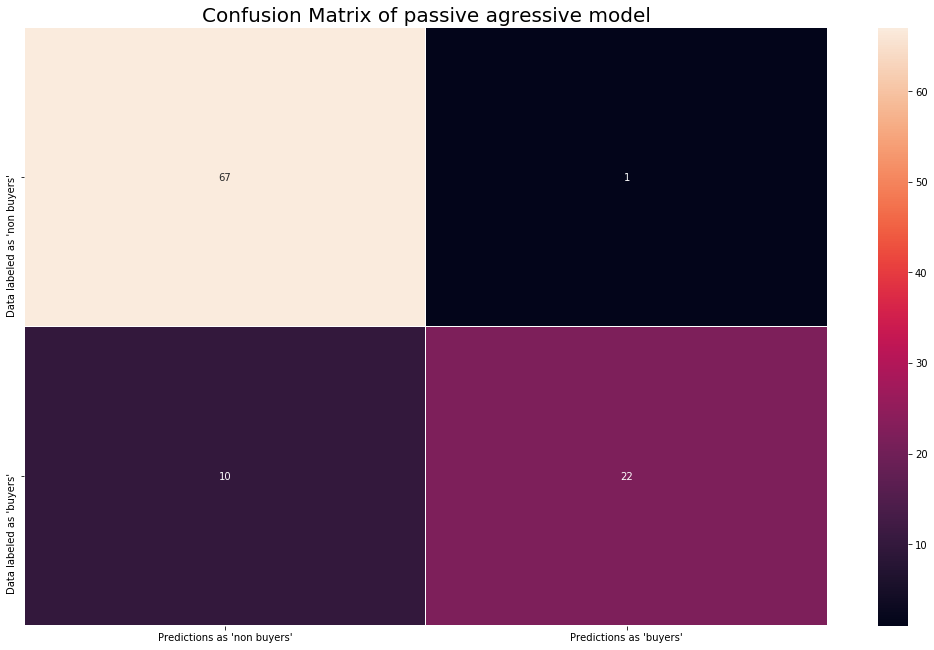

In [10]:
plt.figure(figsize=(18,11))
plt.title("Confusion Matrix of passive agressive model", fontsize=20)
ax = sns.heatmap(
    passive_agressive_cm,
    annot=True,
    linewidths=.01,
    xticklabels= ["Predictions as 'non buyers'", "Predictions as 'buyers'"],
    yticklabels= ["Data labeled as 'non buyers'", "Data labeled as 'buyers'"]
)

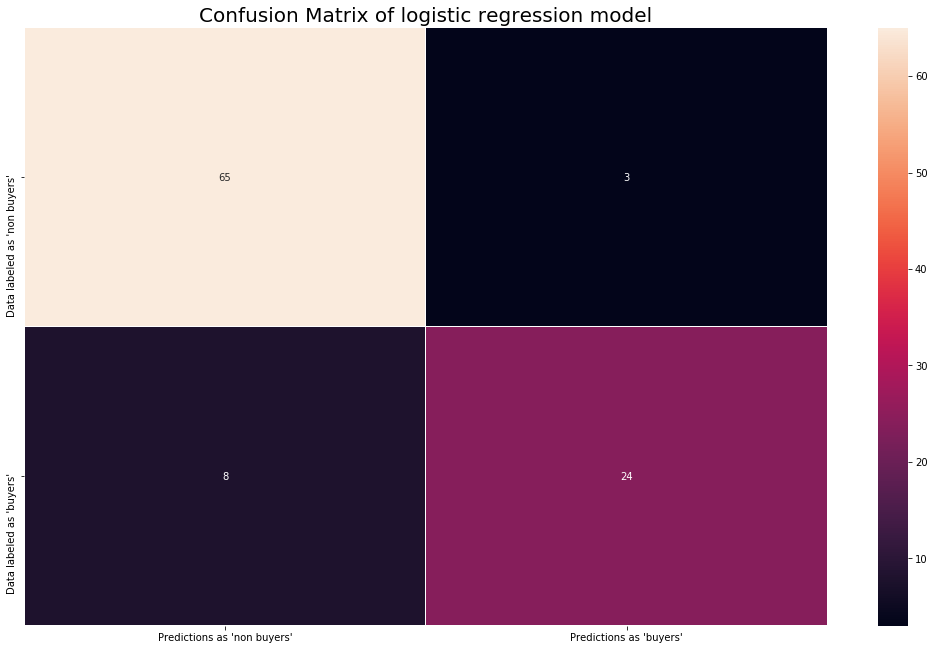

In [11]:
plt.figure(figsize=(18,11))
plt.title("Confusion Matrix of logistic regression model", fontsize=20)
ax = sns.heatmap(
    logistic_regression_cm,
    annot=True,
    linewidths=.01,
    xticklabels= ["Predictions as 'non buyers'", "Predictions as 'buyers'"],
    yticklabels= ["Data labeled as 'non buyers'", "Data labeled as 'buyers'"]
)

# Extracting classification report

In [12]:
from sklearn.metrics import classification_report
sthocastic_report = classification_report(y_test, stochatisc_y_pred, target_names=['Non buyers', 'Buyers'])
passive_agressive_report = classification_report(y_test, passive_agressive_y_pred, target_names=['Non buyers', 'Buyers'])
logistic_report = classification_report(y_test, logistic_regression_y_pred, target_names=['Non buyers', 'Buyers'])

In [13]:
print("---------------Stochastic gradient model report---------------")
print(sthocastic_report)

---------------Stochastic gradient model report---------------
              precision    recall  f1-score   support

  Non buyers       0.91      0.94      0.93        68
      Buyers       0.87      0.81      0.84        32

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [14]:
print("---------------Passive agressive model report---------------")
print(passive_agressive_report)

---------------Passive agressive model report---------------
              precision    recall  f1-score   support

  Non buyers       0.87      0.99      0.92        68
      Buyers       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [15]:
print("---------------Logistic regression model report---------------")
print(logistic_report)

---------------Logistic regression model report---------------
              precision    recall  f1-score   support

  Non buyers       0.89      0.96      0.92        68
      Buyers       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



# Visualising


## Stochastic gradient model

### Trainig set results

In [16]:
X_set = sc.inverse_transform(X_train)
y_set = y_train

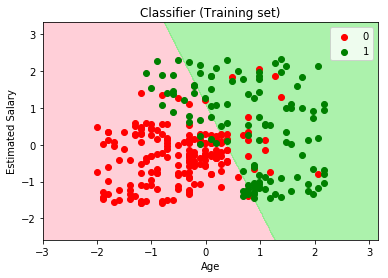

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, stochastic_grad_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set results

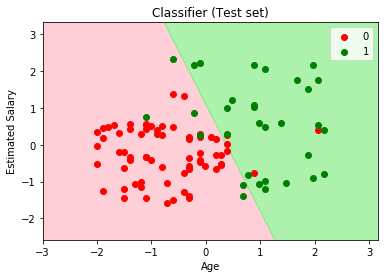

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, stochastic_grad_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Passive Agressive model

### Trainig set results

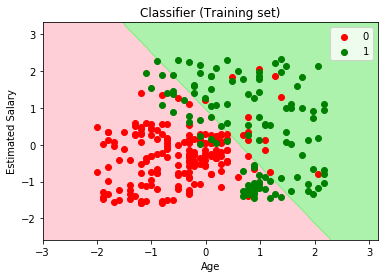

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, passive_agressive_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set results

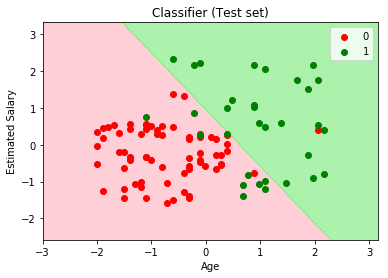

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, passive_agressive_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Logistic regression model

### Trainig set results

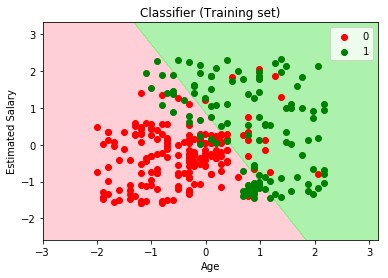

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set results

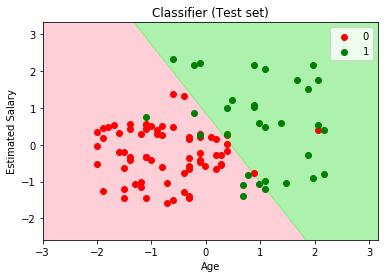

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array([ListedColormap(('red', 'green'))(i)]), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Awesome!

### Credits
based on superdatascience.com Machine Learning A-Z, by Kirill Eremenko and Hadelin de Ponteves. Thanks For sharing the knowleged!